# Check simpldiff eemulator data grid
===================================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  26 October 2023
- Last verification : October 26th 2023

===================================================================================

In [1]:
# Import some generally useful packages

import os
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice
import seaborn as sns

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from diffemulator.diffemulator  import SimpleDiffAtmEmulator,final_path_data
from diffemulator.diffemulator  import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
List_Of_All_sites = list(Dict_Of_sitesPressures.keys()) 
List_Of_All_sites 

['LSST', 'CTIO', 'OHP', 'PDM', 'OMK', 'OSL']

# Configuration

In [6]:
site = 'LSST'
emul  = SimpleDiffAtmEmulator(obs_str=site)
path = final_path_data

Observatory LSST found in preselected observation sites


I0000 00:00:1698323184.257142       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [7]:
file1_in = os.path.join(path,emul.fn_rayleigh)

In [8]:
file2_in = os.path.join(path,emul.fn_O2abs)

In [9]:
file3_in = os.path.join(path,emul.fn_PWVabs)

In [10]:
file4_in = os.path.join(path,emul.fn_OZabs)

### wavelength

In [11]:
emul.WLMIN

300.0

In [12]:
type(emul.WL)

jaxlib.xla_extension.ArrayImpl

In [13]:
WLMIN = emul.WLMIN
WLMAX = emul.WLMAX
WLBIN = emul.WLBIN
NWLBIN = emul.NWLBIN
WL= emul.GetWL()

In [14]:
type(WL)

jaxlib.xla_extension.ArrayImpl

### airmass

In [15]:
AIRMASSMIN = emul.AIRMASSMIN
AIRMASSMAX= emul.AIRMASSMAX
DAM = emul.DAIRMASS

In [16]:
airmasses = emul.AIRMASS

In [17]:
airmasses

Array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5], dtype=float32)

In [18]:
NAM=len(airmasses)

In [19]:
sequential_colors = sns.color_palette("hls", NAM)

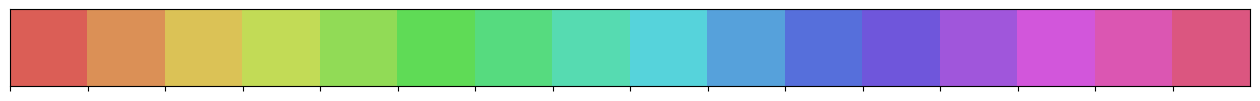

In [20]:
sns.palplot(sequential_colors)

In [21]:
airmass = airmasses

In [22]:
NX=len(airmasses)
NY=NWLBIN

### PWV

In [23]:
PWVMIN = emul.PWVMIN
PWVMAX = emul.PWVMAX
DPWV = emul.DPWV

In [24]:
pwvs = emul.PWV

In [25]:
NPWV = len(pwvs)

### OZON

In [26]:
OZMIN = emul.OZMIN
OZMAX = emul.OZMAX
DOZ   = emul.DOZ

In [27]:
ozs = emul.OZ

In [28]:
NOZ = len(ozs)

### Data

In [31]:
with open(file1_in, 'rb') as f:
    data_rayleigh=np.load(f)
    data_rayleigh = jnp.array(data_rayleigh)
with open(file2_in, 'rb') as f:    
    data_O2abs = np.load(f)
    data_O2abs = jnp.array(data_O2abs)
with open(file3_in, 'rb') as f:  
    data_H2Oabs=np.load(f)
    data_H2Oabs = jnp.array(data_H2Oabs)
with open(file4_in, 'rb') as f:     
    data_OZabs=np.load(f)
    data_OZabs= jnp.array(data_OZabs)
    

Text(0.5, 1.0, 'Rayleigh profiles')

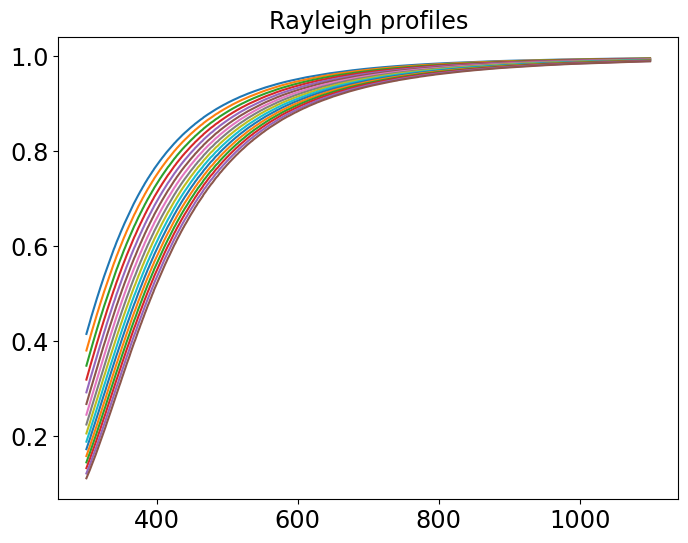

In [32]:
plt.plot(WL,data_rayleigh[:,:]);
plt.title("Rayleigh profiles")

Text(0.5, 1.0, 'O2 absorption profiles')

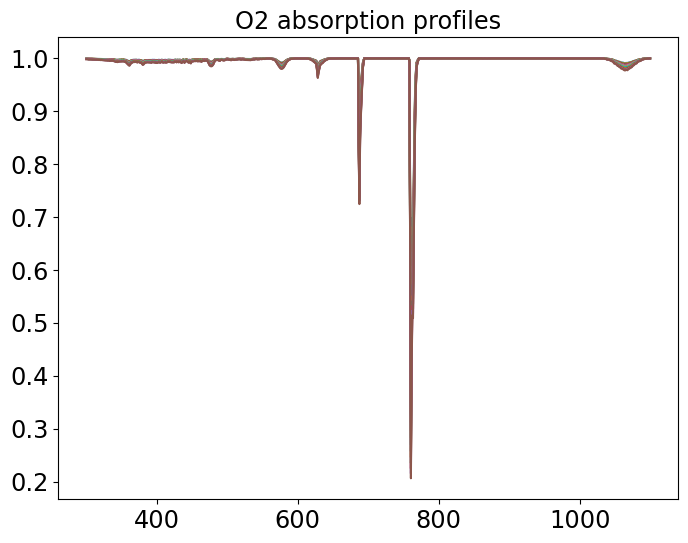

In [33]:
plt.plot(WL,data_O2abs[:,:]);
plt.title("O2 absorption profiles")

Text(0.5, 1.0, 'H2O absorption  profiles')

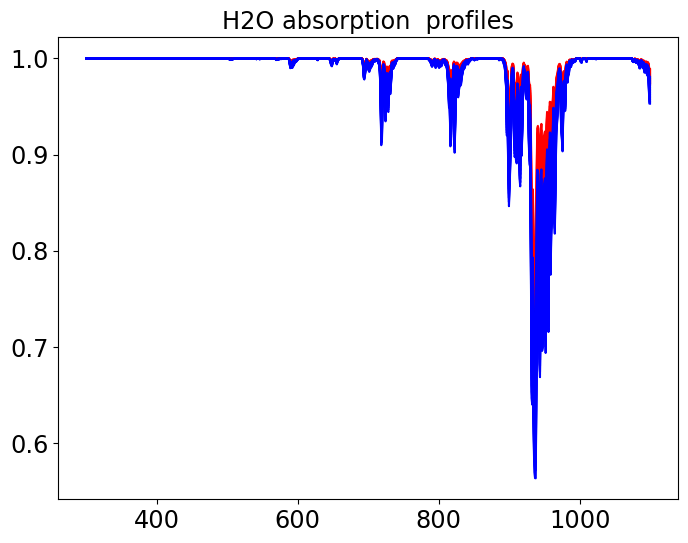

In [34]:
plt.plot(WL,data_H2Oabs[:,:,5],'r');
plt.plot(WL,data_H2Oabs[:,:,9],'b');
plt.title("H2O absorption  profiles")

Text(0.5, 1.0, 'H2O absorption profiles')

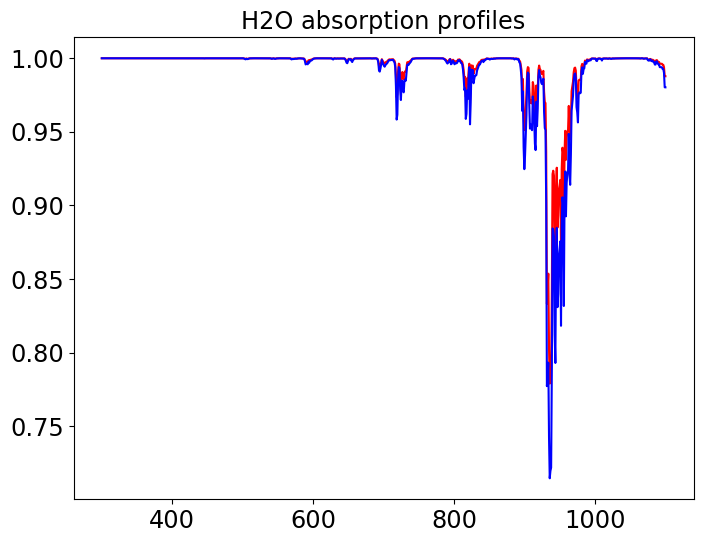

In [35]:
plt.plot(WL,data_H2Oabs[:,1,5],'r');
plt.plot(WL,data_H2Oabs[:,8,5],'b');
plt.title("H2O absorption profiles")